In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import awkward as ak

In [2]:
MCLund_pref = "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/"
day_dir_driver = "September_25"
day_dir_MCNP = "October_14"
day_dir = "October_13"

In [47]:
# driver_low = up.concatenate(MCLund_pref + f"Analysis/BoxAffinity/root_files/{day_dir}/old_R2_driver_low.root:tree_driver")
driver_MCNP = up.concatenate(MCLund_pref + f"Analysis/BoxAffinity/root_files/{day_dir}/old_R2_driver_MCNP_all_All.root:tree_driver")
driver_MCNP_adjust = up.concatenate(MCLund_pref + f"Analysis/BoxAffinity/root_files/October_15/old_R2_driver_MCNP_all_All.root:tree_driver")
driver_MCNP_adjust_flipped_Mki2_sign = up.concatenate(MCLund_pref + f"Analysis/BoxAffinity/root_files/October_15/Mki2_sign_flipped_old_R2_driver_MCNP_all_All.root:tree_driver")
driver = up.concatenate(MCLund_pref + f"Analysis/BoxAffinity/root_files/{day_dir_driver}/old_R2_driver_All.root:tree_driver")
MC = up.concatenate(MCLund_pref + f"OutputFiles/Files_Spring_24/{day_dir}/run_3_100kevents.root:tree_MC")
JLAB22 = pd.read_excel("jlab22_pip.xlsx")


In [48]:
MC_df = ak.to_dataframe(MC)
MC_df['pT'] = MC_df['pT_BF']
MC_df['qT/Q'] = MC_df['qTQ_HF']

In [49]:
def get_bin_centers(bin_var):
    bin_edges = var_binnings[bin_var]
    return (bin_edges[1:] + bin_edges[:-1]) / 2

In [50]:
MC_df

,M,M_h,pT_BF,x,z,Q2,R0,R1,R2,R2_adjust,...,kf_x,kf_y,kf_z,kf_E,kf_Plus,kf_Minus,event_num,R1p,pT,qT/Q
entry,,,,,,,,,,,,,,,,,,,,,
0,0.9383,0.1396,0.372743,0.163209,0.519495,2.187441,0.459002,0.404158,0.038544,0.245794,...,0.145583,-0.268371,-0.710963,0.773811,0.044440,1.049893,2.0,1.591548,0.372743,0.495776
1,0.9383,0.1396,0.568032,0.199568,0.344123,2.363906,0.715534,1.625852,0.081952,1.226076,...,0.345711,-0.233043,-0.705716,0.819731,0.080620,1.078654,3.0,0.862194,0.568032,1.107283
2,0.9383,0.1396,0.145979,0.143593,0.510882,2.115279,0.048363,0.052256,0.048363,0.039972,...,0.107930,-0.041433,-0.691997,0.701658,0.006831,0.985463,5.0,1.778980,0.145979,0.199930
3,0.9383,0.1396,0.237518,0.169969,0.376156,1.476711,0.549321,0.170722,0.549321,0.290465,...,-0.731534,-0.393194,-0.273820,0.874501,0.424746,0.811986,8.0,1.106575,0.237518,0.538948
4,0.9383,0.1396,0.456901,0.161929,0.458246,1.731593,0.535297,0.623861,0.036077,0.606467,...,-0.032902,0.106572,-0.681676,0.690763,0.006426,0.970461,11.0,1.415001,0.456901,0.778760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.9383,0.1396,0.432638,0.395355,0.670564,4.570189,0.252228,0.233688,0.140132,0.102169,...,0.088665,-0.659395,-0.919111,1.134663,0.152418,1.452237,198371.0,0.848082,0.432638,0.319639
99997,0.9383,0.1396,0.228400,0.228446,0.358094,1.841449,0.607299,0.518261,0.287297,0.244986,...,0.023106,-0.629022,-0.483561,0.793766,0.219348,0.903207,198372.0,0.783787,0.228400,0.494961
99998,0.9383,0.1396,0.631082,0.310986,0.588729,4.217273,0.190138,0.132256,0.190138,0.294784,...,-0.668623,-0.395653,-0.831559,1.138033,0.216710,1.392711,198374.0,0.946581,0.631082,0.542940


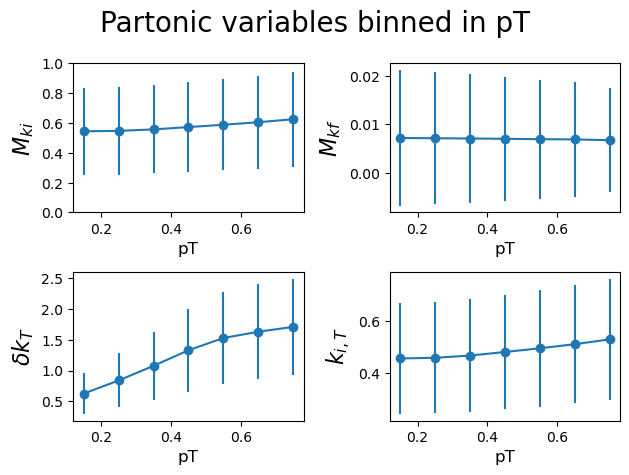

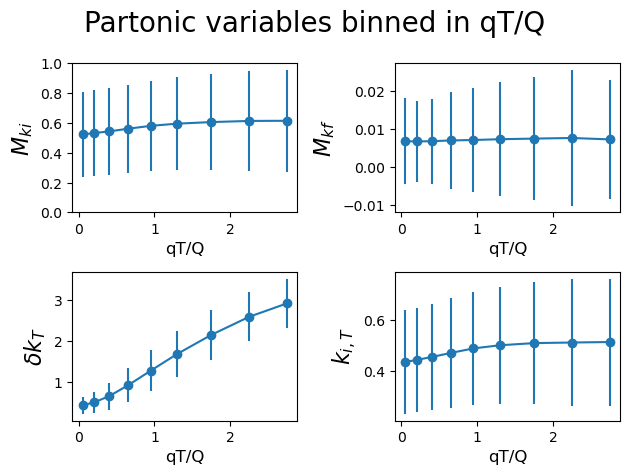

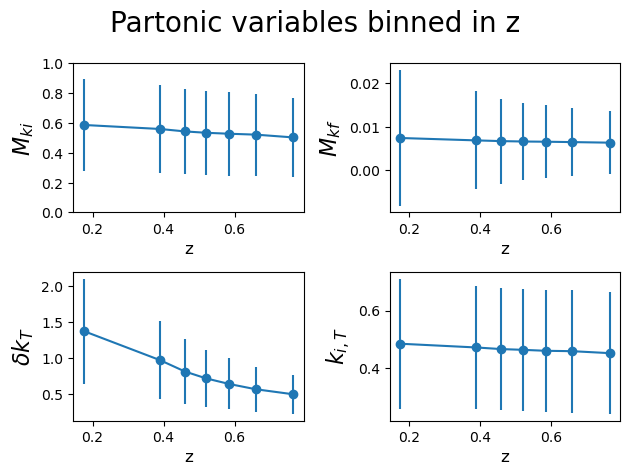

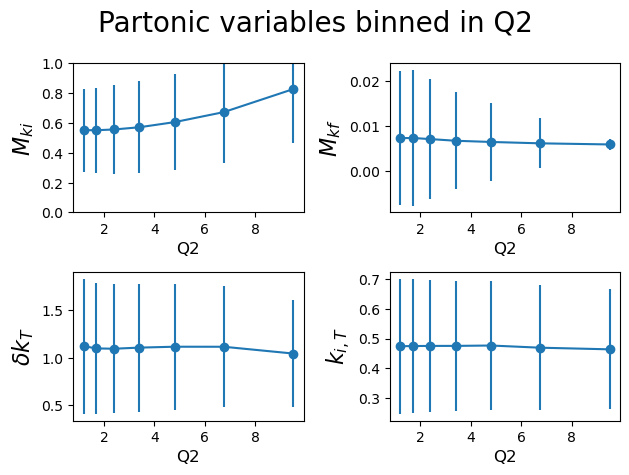

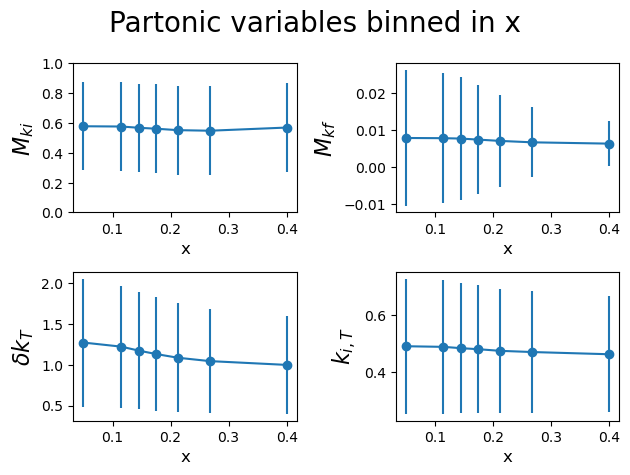

In [44]:
bin_vars = ["pT", "qT/Q", "z", "Q2", "x"]
var_binnings = {
    "x" : np.array([0,0.1,0.13,0.16,0.19,0.235,0.3,0.5]),
    "pT" : np.linspace(0.1,0.8,8),
    "z" : np.array([0,0.35,0.43,0.49,0.55,0.62,0.7,0.83]),
    "Q2" : np.array([0,1,1.4,2,2.8,4,5.6,7.9,11.1]),
    "qT/Q" : np.array([0,0.1,0.3,0.5,0.8,1.1,1.5,2,2.5,3])
}
bin_var_safe_dict = {
    "qT/Q" : "qTQ",
    "x" : "x",
    "pT" : "pT",
    "z" : "z",
    "Q2" : "Q2"
}
for bin_var in bin_vars:
    fig,axs = plot.subplots(2,2)
    fig.suptitle(f"Partonic variables binned in {bin_var}",fontsize = 20)
    bin_edges = var_binnings[bin_var]
    means = {
        "M_ki" : np.zeros(len(bin_edges) - 1),
        "M_kf" : np.zeros(len(bin_edges) - 1),
        "delta_k_t" : np.zeros(len(bin_edges) - 1),
        "ki_t" : np.zeros(len(bin_edges - 1) - 1)
    }
    stds = {
        "M_ki" : np.zeros(len(bin_edges) - 1),
        "M_kf" : np.zeros(len(bin_edges) - 1),
        "delta_k_t" : np.zeros(len(bin_edges) - 1),
        "ki_t" : np.zeros(len(bin_edges) - 1)
    }
    for bin_idx in range(len(bin_edges) - 1):
        bin_lb = bin_edges[bin_idx]
        bin_ub = bin_edges[bin_idx + 1]
        MC_df_cut = MC_df[(MC_df[bin_var] > bin_lb) & (MC_df[bin_var] < bin_ub)]
        means["M_ki"][bin_idx] = MC_df_cut["M_ki"].mean()
        means["M_kf"][bin_idx] = MC_df_cut["M_kf"].mean()
        means["delta_k_t"][bin_idx] = MC_df_cut["delta_k_t"].mean()
        means["ki_t"][bin_idx] = MC_df_cut["ki_t"].mean()

        stds["M_ki"][bin_idx] = MC_df_cut["M_ki"].std()
        stds["M_kf"][bin_idx] = MC_df_cut["M_kf"].std()
        stds["delta_k_t"][bin_idx] = MC_df_cut["delta_k_t"].std()
        stds["ki_t"][bin_idx] = MC_df_cut["ki_t"].std()
    axs[0,0].errorbar(get_bin_centers(bin_var),means["M_ki"],yerr = stds["M_ki"], marker = "o")
    axs[0,0].set_ylabel("$M_{ki}$",fontsize = 16)
    axs[0,0].set_ylim(0,1)
    axs[0,0].set_xlabel(bin_var, fontsize = 12)
    axs[0,1].errorbar(get_bin_centers(bin_var),means["M_kf"],yerr = stds["M_kf"], marker = "o")
    axs[0,1].set_ylabel("$M_{kf}$",fontsize = 16)
    axs[0,1].set_xlabel(bin_var, fontsize = 12)
    axs[1,0].errorbar(get_bin_centers(bin_var),means["delta_k_t"],yerr = stds["delta_k_t"], marker = "o")
    axs[1,0].set_ylabel("$\delta k_{T}$",fontsize = 16)
    axs[1,0].set_xlabel(bin_var, fontsize = 12)
    axs[1,1].errorbar(get_bin_centers(bin_var),means["ki_t"],yerr = stds["ki_t"], marker = "o")
    axs[1,1].set_ylabel("$k_{i,T}$",fontsize = 16)
    axs[1,1].set_xlabel(bin_var, fontsize = 12)
    fig.tight_layout()
    bin_var_safe = bin_var_safe_dict[bin_var]
    fig.savefig(f"plots_October_2025/partonic_averages_uncertainties/{bin_var_safe}.jpeg")
        

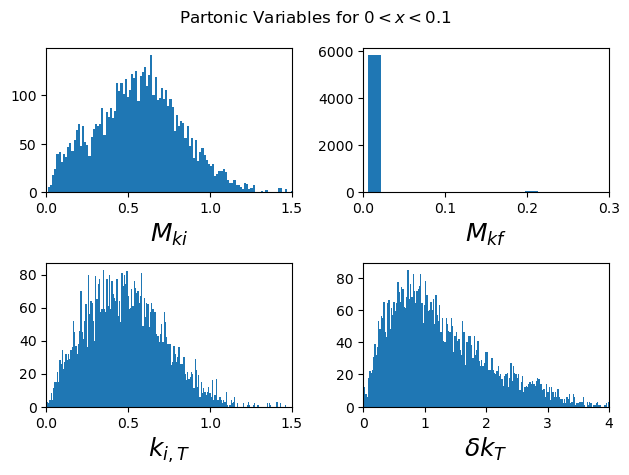

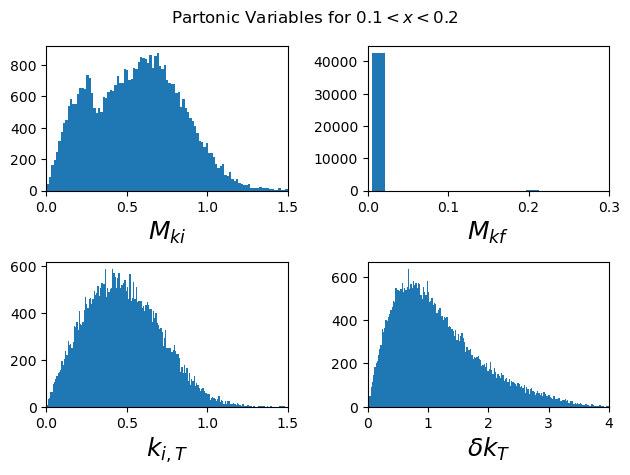

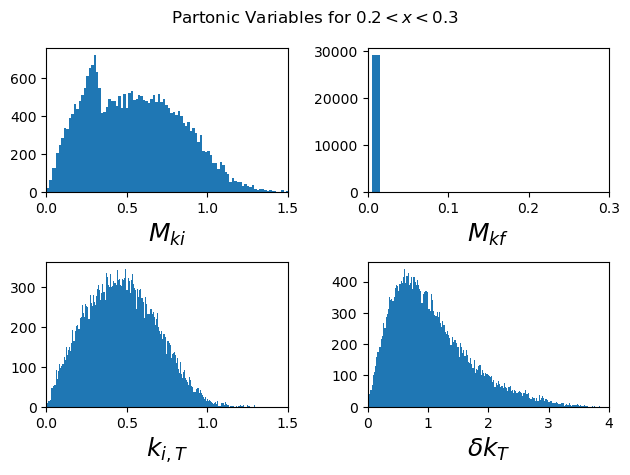

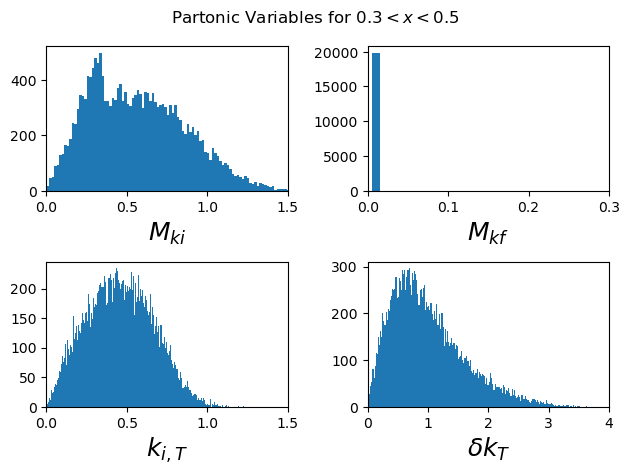

In [50]:

x_bin_edges = [0,0.1,0.2,0.3,0.5]
for i in range(4):
    fig,axs = plot.subplots(2,2)
    lb = x_bin_edges[i]
    ub = x_bin_edges[i+1]
    MC_df_cut = MC_df[(MC_df['x'] > lb) & (MC_df['x'] < ub)]
    axs[0,0].hist(MC_df_cut['M_ki'],bins = 200);
    axs[0,0].set(xlim=(0,1.5))
    axs[0,0].set_xlabel('$M_{ki}$',fontsize = 18)
    axs[0,1].hist(MC_df_cut['M_kf'],bins = 20);
    axs[0,1].set(xlim=(0,0.3))
    axs[0,1].set_xlabel('$M_{kf}$',fontsize = 18)
    axs[1,0].hist(MC_df_cut['ki_t'],bins = 200);
    axs[1,0].set(xlim=(0,1.5))
    axs[1,0].set_xlabel('$k_{i,T}$',fontsize = 18)
    axs[1,1].hist(MC_df_cut['delta_k_t'],bins = 200);
    axs[1,1].set(xlim=(0,4))
    axs[1,1].set_xlabel('$\delta k_{T}$',fontsize = 18)
    fig.suptitle(f"Partonic Variables for $ {lb} < x < {ub}$")
    fig.tight_layout()
    fig.savefig(f"plots_October_2025/partons_x_lb_{lb}_ub_{ub}.jpeg")
    

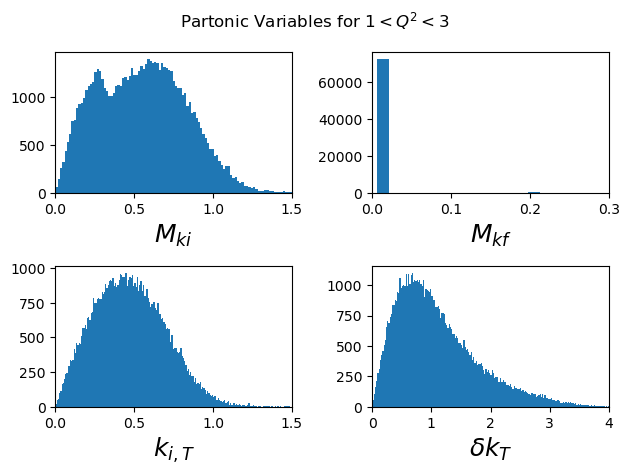

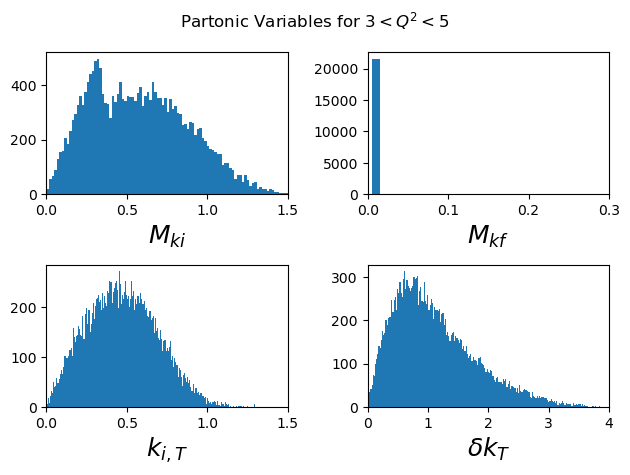

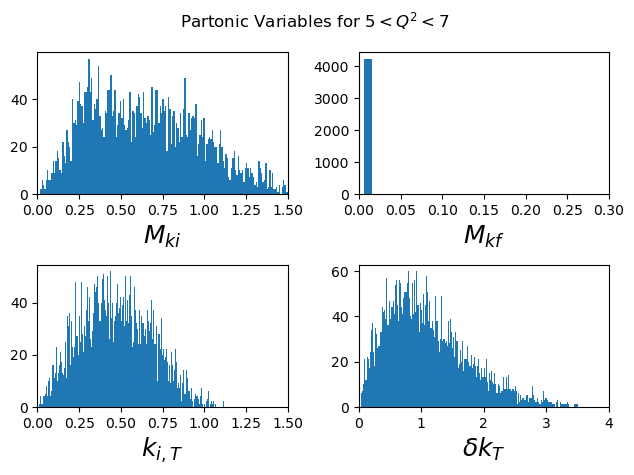

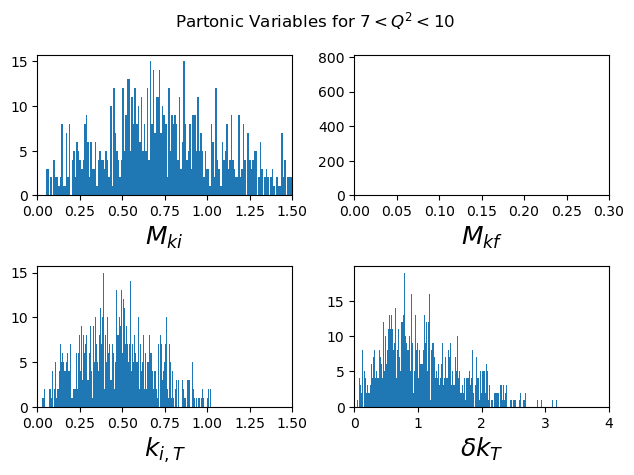

In [49]:

Q2_bin_edges = [1,3,5,7,10]
for i in range(4):
    fig,axs = plot.subplots(2,2)
    lb = Q2_bin_edges[i]
    ub = Q2_bin_edges[i+1]
    MC_df_cut = MC_df[(MC_df['Q2'] > lb) & (MC_df['Q2'] < ub)]
    axs[0,0].hist(MC_df_cut['M_ki'],bins = 200);
    axs[0,0].set(xlim=(0,1.5))
    axs[0,0].set_xlabel('$M_{ki}$',fontsize = 18)
    axs[0,1].hist(MC_df_cut['M_kf'],bins = 20);
    axs[0,1].set(xlim=(0,0.3))
    axs[0,1].set_xlabel('$M_{kf}$',fontsize = 18)
    axs[1,0].hist(MC_df_cut['ki_t'],bins = 200);
    axs[1,0].set(xlim=(0,1.5))
    axs[1,0].set_xlabel('$k_{i,T}$',fontsize = 18)
    axs[1,1].hist(MC_df_cut['delta_k_t'],bins = 200);
    axs[1,1].set(xlim=(0,4))
    axs[1,1].set_xlabel('$\delta k_{T}$',fontsize = 18)
    fig.suptitle(f"Partonic Variables for $ {lb} < Q^2 < {ub}$")
    fig.tight_layout()
    fig.savefig(f"plots_October_2025/partons_Q2_lb_{lb}_ub_{ub}.jpeg")
    

In [3]:
my_df = pd.read_csv("CLAS12_Mki_Mkf_deltakt_kit_w_all.csv")

In [4]:
x = my_df['x']

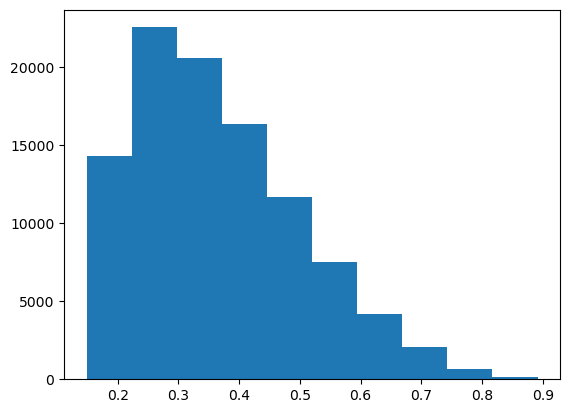

In [8]:
_,bins,_ = plot.hist(my_df['z'],bins = 10)

In [11]:
bin_centers = np.empty(10)
for i in range(10):
    bin_centers[i] = (bins[i] + bins[i + 1]) / 2

In [12]:
bin_centers

array([0.18597575, 0.26024474, 0.33451373, 0.40878272, 0.48305171,
       0.55732071, 0.6315897 , 0.70585869, 0.78012768, 0.85439667])

In [59]:
new_df = my_df[["M","M_h","x","z","Q","T_t"]]
new_df.to_csv("CLAS12_Hadronic_only.csv")

In [58]:
new_df

,M,M_h,x,z,Q,T_t
0,0.9383,0.1396,0.163209,0.519495,1.4790,0.727220
1,0.9383,0.1396,0.199568,0.344123,1.5375,1.706313
2,0.9383,0.1396,0.143593,0.510882,1.4544,0.288354
3,0.9383,0.1396,0.169969,0.376156,1.2152,0.646197
4,0.9383,0.1396,0.161929,0.458246,1.3159,1.018783
...,...,...,...,...,...,...
99996,0.9383,0.1396,0.395355,0.670564,2.1378,0.666083
99997,0.9383,0.1396,0.228446,0.358094,1.3570,0.658378
99998,0.9383,0.1396,0.310986,0.588729,2.0536,1.099542
99999,0.9383,0.1396,0.327501,0.352208,1.6604,1.612383


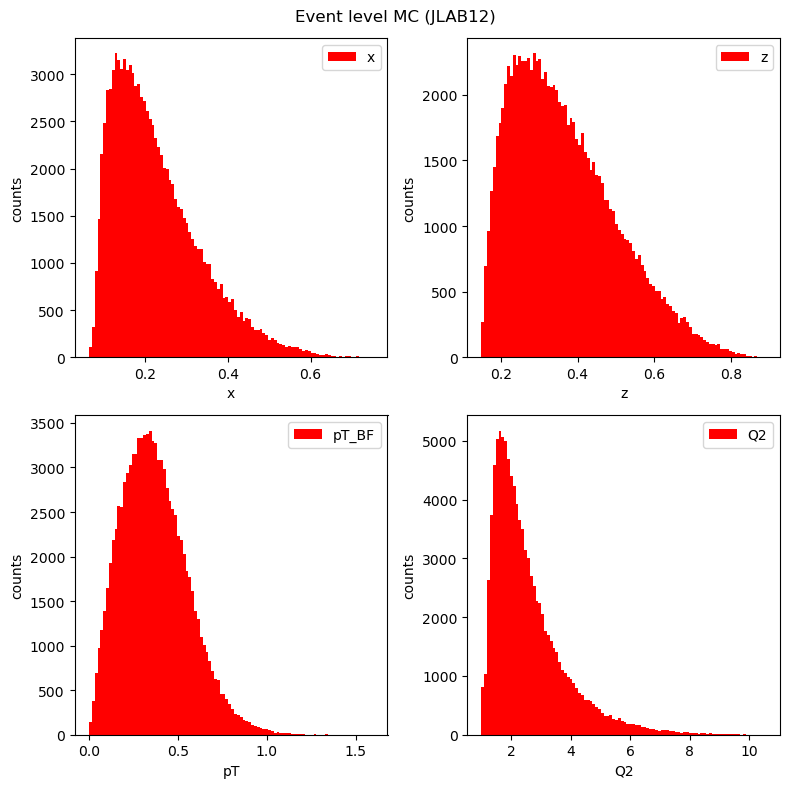

In [28]:
kinematics = ["x","z","pT_BF","Q2"]
fig,axs = plot.subplots(2,2,figsize = (8,8))
for i in range(len(kinematics)):
    row = i // 2
    column = i % 2
    axs[row,column].hist(MC[kinematics[i]],label = kinematics[i],bins = 100,color = "red")
    axs[row,column].legend()
    axs[row,column].set_ylabel("counts")
    axs[row,column].set_xlabel(kinematics_jlab22[i])
fig.suptitle("Event level MC (JLAB12)")
fig.tight_layout()
fig.savefig("histos_event_level_MC_only.pdf")

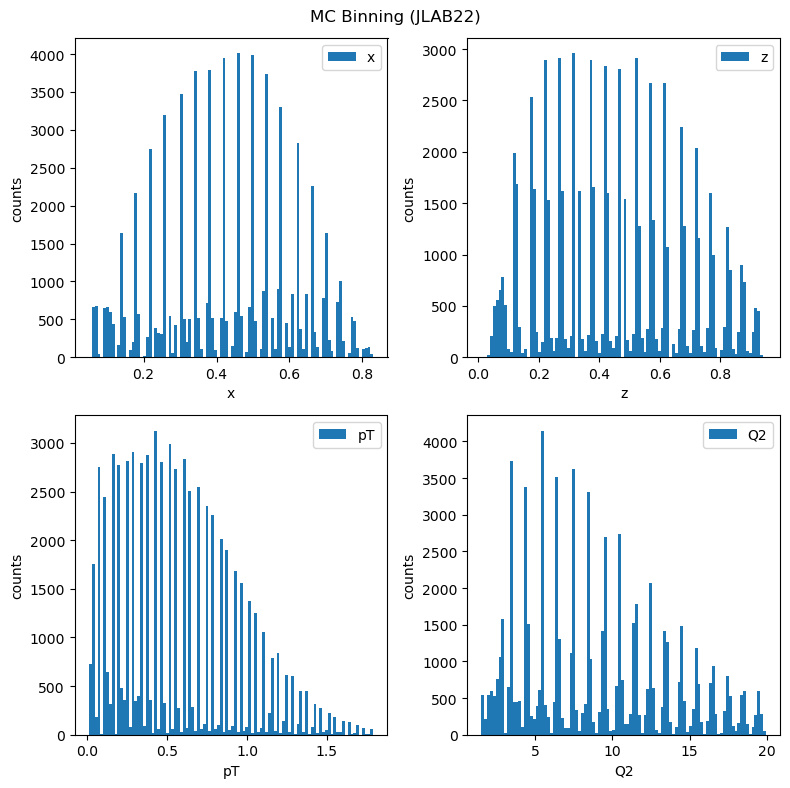

In [25]:
kinematics_jlab22 = ["x","z","pT","Q2"]
fig,axs = plot.subplots(2,2,figsize = (8,8))
for i in range(len(kinematics_jlab22)):
    row = i // 2
    column = i % 2
    axs[row,column].hist(JLAB22[kinematics_jlab22[i]],label = kinematics_jlab22[i],bins = 100)
    axs[row,column].legend()
    axs[row,column].set_ylabel("counts")
    axs[row,column].set_xlabel(kinematics_jlab22[i])
fig.suptitle("MC Binning (JLAB22)")
fig.tight_layout()
fig.savefig("histos_Binned_MC_only.pdf")

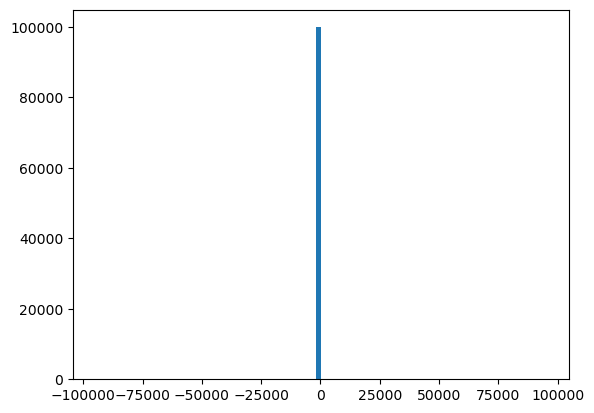

In [47]:
plot.hist(MC["R1"],bins = 100);

In [48]:
JLAB12 = pd.read_excel("jlab12(3).xlsx")

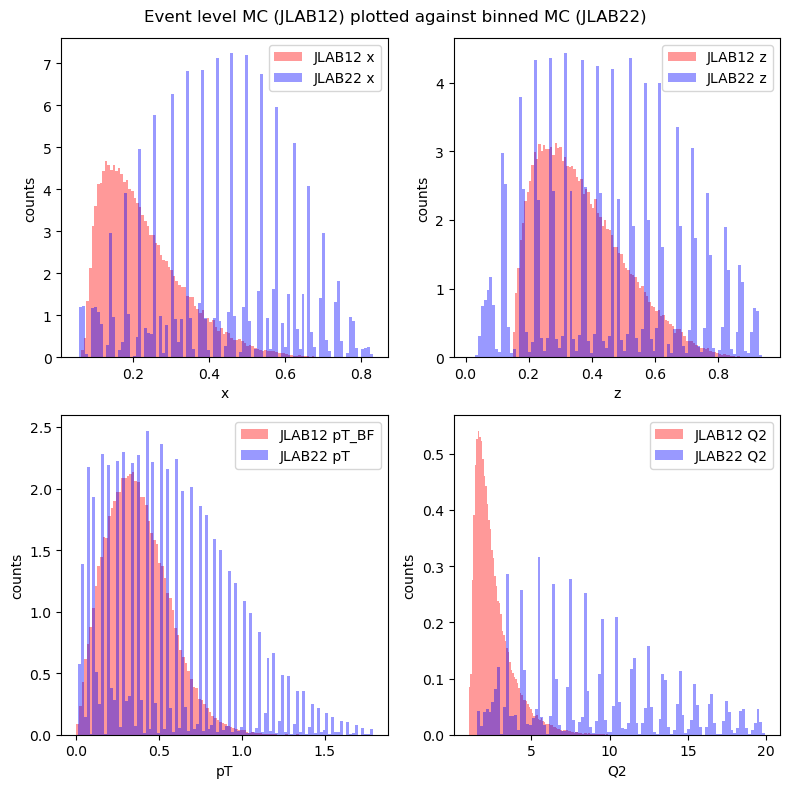

In [44]:
kinematics = ["x","z","pT_BF","Q2"]
fig,axs = plot.subplots(2,2,figsize = (8,8))
for i in range(len(kinematics)):
    row = i // 2
    column = i % 2
    axs[row,column].hist(MC[kinematics[i]],label = f"JLAB12 {kinematics[i]}",bins = 100,alpha = 0.4,color = "red",density = True)
    axs[row,column].hist(JLAB22[kinematics_jlab22[i]],label = f"JLAB22 {kinematics_jlab22[i]}",bins = 100,alpha = 0.4,color = "blue",density = True)
    axs[row,column].legend()
    axs[row,column].set_ylabel("counts")
    axs[row,column].set_xlabel(kinematics_jlab22[i])
fig.suptitle("Event level MC (JLAB12) plotted against binned MC (JLAB22)")
fig.tight_layout()
# fig.savefig("histos_Binned_MC_vs_event_level_MC.pdf")

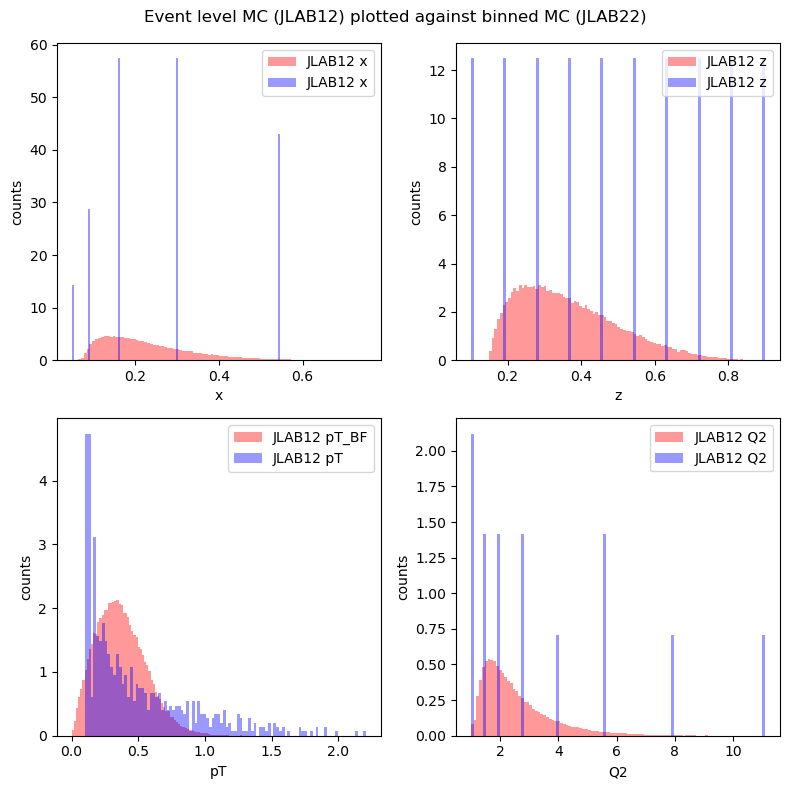

In [49]:
kinematics = ["x","z","pT_BF","Q2"]
fig,axs = plot.subplots(2,2,figsize = (8,8))
for i in range(len(kinematics)):
    row = i // 2
    column = i % 2
    axs[row,column].hist(MC[kinematics[i]],label = f"JLAB12 {kinematics[i]}",bins = 100,alpha = 0.4,color = "red",density = True)
    axs[row,column].hist(JLAB12[kinematics_jlab22[i]],label = f"JLAB12 {kinematics_jlab22[i]}",bins = 100,alpha = 0.4,color = "blue",density = True)
    axs[row,column].legend()
    axs[row,column].set_ylabel("counts")
    axs[row,column].set_xlabel(kinematics_jlab22[i])
fig.suptitle("Event level MC (JLAB12) plotted against binned MC (JLAB22)")
fig.tight_layout()
# fig.savefig("histos_Binned_MC_vs_event_level_MC.pdf")

<Array [0.519, 0.344, 0.511, ..., 0.589, 0.352, 0.383] type='100001 * float64'>

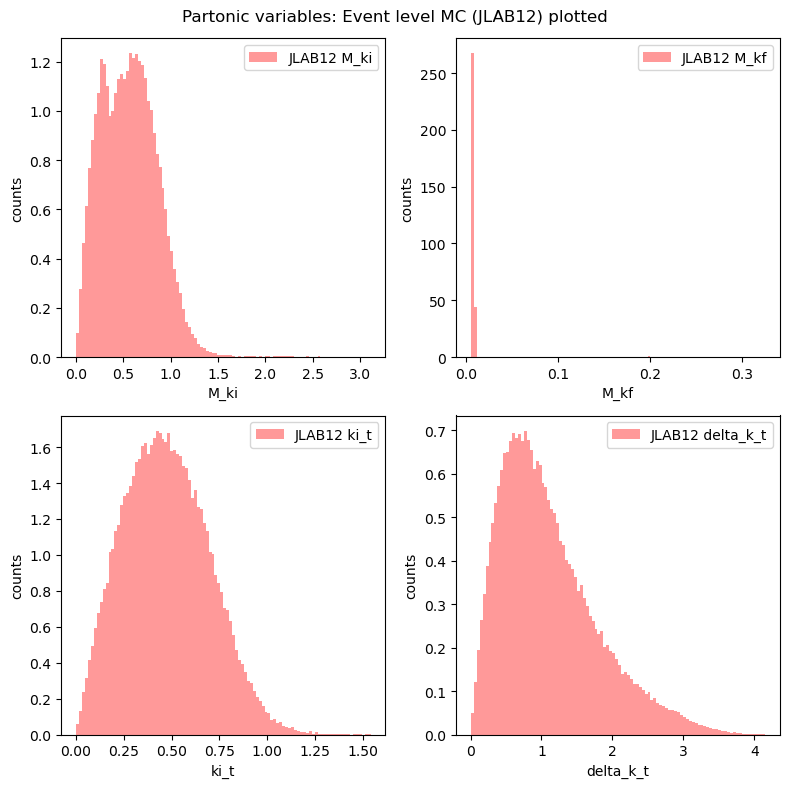

In [41]:
partonic = ["M_ki","M_kf","ki_t","delta_k_t"]
partonic_22 = ["Mki","Mkf","ki_t","delta_k_t"]
fig,axs = plot.subplots(2,2,figsize = (8,8))
for i in range(len(kinematics)):
    row = i // 2
    column = i % 2
    axs[row,column].hist(MC[partonic[i]],label = f"JLAB12 {partonic[i]}",bins = 100,alpha = 0.4,color = "red",density = True)
    # axs[row,column].hist(JLAB22[kinematics_jlab22[i]],label = f"JLAB22 {kinematics_jlab22[i]}",bins = 100,alpha = 0.4,color = "blue",density = True)
    axs[row,column].legend()
    axs[row,column].set_ylabel("counts")
    axs[row,column].set_xlabel(partonic[i])
fig.suptitle("Partonic variables: Event level MC (JLAB12) plotted")
fig.tight_layout()
# fig.savefig("partonic_histos_event_level_MC.pdf")
MC["z"]

# R1 DEMO

## October 15th
trying to solve discrepency between ratlib and MC - seems like the codegen substitution with Mki and deltakt is issue

Text(0.5, 0, '$R_1$')

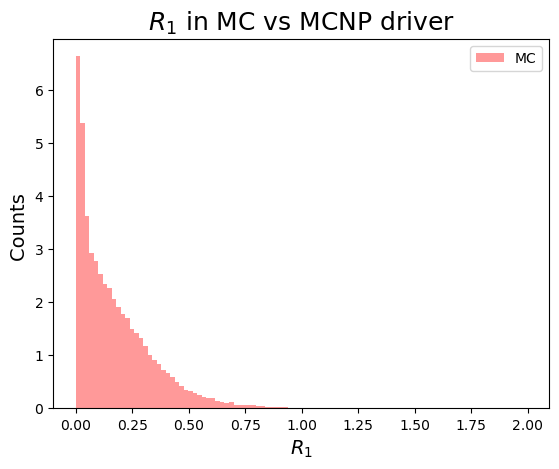

In [11]:
'''CHOOSE ONE OF THE BELOW OPTIONS'''

qtcut = 1
qtcut_type = "gt"

# qtcut = 0.3
# qtcut_type = "lt"

ratios = [MC['R0'],MC['R1'],MC['R2']]
MCNP_ratios = [driver_MCNP['R0'],driver_MCNP['R1'],driver_MCNP['R2']]
driver_ratios = [driver['R0'],driver['R1'],driver['R2']]
adjust_MCNP_ratios = [driver_MCNP_adjust['R0'],driver_MCNP_adjust['R1'],driver_MCNP_adjust['R2']]
adjust2_MCNP_ratios = [driver_MCNP_adjust_flipped_Mki2_sign['R0'],driver_MCNP_adjust_flipped_Mki2_sign['R1'],driver_MCNP_adjust_flipped_Mki2_sign['R2']]

'''UNCOMMENT IF YOU WANT TO APPLY qT/Q CUT'''

# for i in range(3):
#     if(qtcut_type == "gt"):
#         ratios[i] = ratios[i][MC["qTQ_HF"] >qtcut]
#         MCNP_ratios[i] = MCNP_ratios[i][driver_MCNP["qTQ_hadron"] >qtcut]
#         driver_ratios[i] = driver_ratios[i][driver["qTQ_hadron"] >qtcut]
#         adjust_MCNP_ratios[i] = adjust_MCNP_ratios[i][driver_MCNP_adjust["qTQ_hadron"] >qtcut]
#         adjust2_MCNP_ratios[i] = adjust2_MCNP_ratios[i][driver_MCNP_adjust_flipped_Mki2_sign["qTQ_hadron"] >qtcut]
#     else:
#         ratios[i] = ratios[i][MC["qTQ_HF"] <qtcut]
#         MCNP_ratios[i] = MCNP_ratios[i][driver_MCNP["qTQ_hadron"] <qtcut]
#         driver_ratios[i] = driver_ratios[i][driver["qTQ_hadron"] <qtcut]
#         adjust_MCNP_ratios[i] = adjust_MCNP_ratios[i][driver_MCNP_adjust["qTQ_hadron"] <qtcut]
#         adjust2_MCNP_ratios[i] = adjust2_MCNP_ratios[i][driver_MCNP_adjust_flipped_Mki2_sign["qTQ_hadron"] <qtcut]


ratios_cut = [[],[],[]]
ratios_cut2 = [[],[],[]]
MCNP_ratios_cut = [[],[],[]]
MCNP_ratios_cut2 = [[],[],[]]
driver_ratios_cut = [[],[],[]]
driver_ratios_cut2 = [[],[],[]]
adjust_MCNP_ratios_cut = [[],[],[]]
adjust_MCNP_ratios_cut2 = [[],[],[]]
adjust2_MCNP_ratios_cut = [[],[],[]]
adjust2_MCNP_ratios_cut2 = [[],[],[]]
ub = 2
lb = 0
for i in range(3):
    ratios_cut[i] = ratios[i][ratios[i] > lb]
    ratios_cut2[i] = ratios_cut[i][ratios_cut[i] < ub]
    MCNP_ratios_cut[i] = MCNP_ratios[i][MCNP_ratios[i] > lb]
    MCNP_ratios_cut2[i] = MCNP_ratios_cut[i][MCNP_ratios_cut[i] < ub]
    driver_ratios_cut[i] = driver_ratios[i][driver_ratios[i] > lb]
    driver_ratios_cut2[i] = driver_ratios_cut[i][driver_ratios_cut[i] < ub]
    adjust_MCNP_ratios_cut[i] = adjust_MCNP_ratios[i][adjust_MCNP_ratios[i] > lb]
    adjust_MCNP_ratios_cut2[i] = adjust_MCNP_ratios_cut[i][adjust_MCNP_ratios_cut[i] < ub]
    adjust2_MCNP_ratios_cut[i] = adjust2_MCNP_ratios[i][adjust2_MCNP_ratios[i] > lb]
    adjust2_MCNP_ratios_cut2[i] = adjust2_MCNP_ratios_cut[i][adjust2_MCNP_ratios_cut[i] < ub]
# if(qtcut_type == "gt"):
#     qt_text = r"$\frac{q_T}{Q}$ > %.1f"%qtcut
#     plot.text(1.25,2,qt_text,fontsize = 20)
# else:
#     qt_text = r"$\frac{q_T}{Q}$ < %.1f"%qtcut
#     plot.text(1.25,2,qt_text,fontsize = 20)


plot.hist(ratios_cut2[2],bins = 100,alpha = 0.4,color = "red",label = "MC",density = True);

'''START HERE AND UNCOMMENT ONE OF THESE THREE TO COMPARE TO MC'''

# plot.hist(MCNP_ratios_cut2[1],bins = 100,alpha = 0.4, label = "MCNP",density = True);
# plot.hist(adjust_MCNP_ratios_cut2[1],bins = 100,alpha = 0.4, label = "MCNP_adjust",density = True);
# plot.hist(adjust2_MCNP_ratios_cut2[1],bins = 100,alpha = 0.4, label = "MCNP_adjust2",density = True);
# plot.hist(driver_ratios_cut2[1],bins = 100,alpha = 0.4, label = "driver",density = True);

'''END'''

plot.legend()
plot.title(r"$R_1$ in MC vs MCNP driver",fontsize = 18)
plot.ylabel("Counts ",fontsize = 14)
plot.xlabel(r"$R_1$",fontsize = 14)
# plot.savefig("BoxAffinity/Plots_S24/Affinity_Solve/R1_all_qTQ_MCxMCNP_adjust2.pdf");

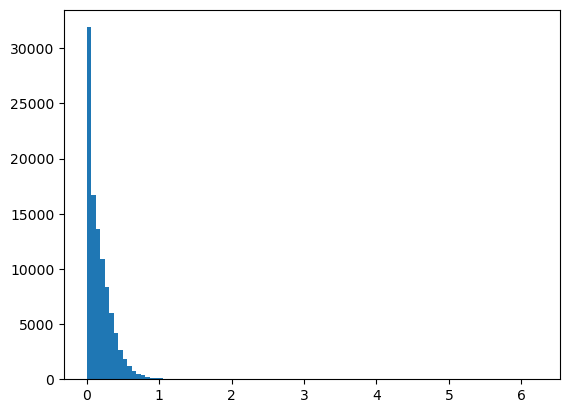

In [23]:
len(MC['R2'][MC['R2'] < 0.3])/len(MC['R2'])

R2_calc = MC['M_ki'] **2 / MC['Q2']
plot.hist(R2_calc,bins = 100);

Text(0.5, 1.0, 'delta_k_t')

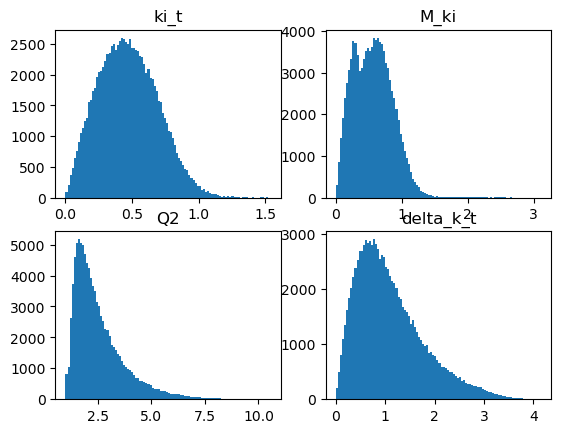

In [21]:
fig,axs = plot.subplots(2,2)
axs[0,0].hist(MC['ki_t'],bins = 100);
axs[0,0].set_title("ki_t")
axs[0,1].hist(MC['M_ki'],bins = 100);
axs[0,1].set_title("M_ki")
axs[1,0].hist(MC['Q2'],bins = 100);
axs[1,0].set_title("Q2")
axs[1,1].hist(MC['delta_k_t'],bins = 100);
axs[1,1].set_title("delta_k_t")

## OLD Plots with variable qT/Q

Text(0.5, 0, '$R_1$')

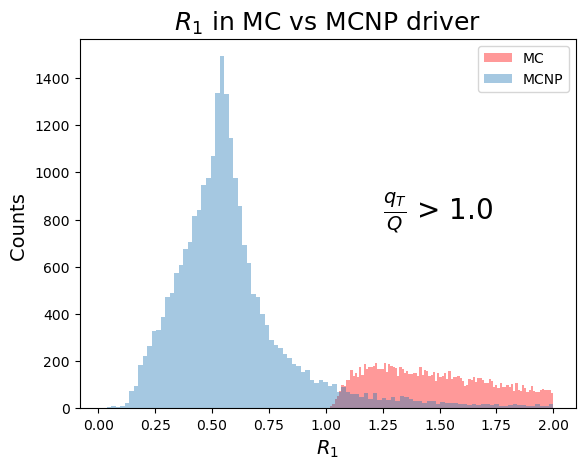

In [20]:
'''CHOOSE ONE OF THE BELOW OPTIONS'''

qtcut = 1
qtcut_type = "gt"

# qtcut = 0.3
# qtcut_type = "lt"

'''END OF OPTIONS'''


ratios = [MC['R0'],MC['R1'],MC['R2']]
MCNP_ratios = [driver_MCNP['R0'],driver_MCNP['R1'],driver_MCNP['R2']]


for i in range(3):
    if(qtcut_type == "gt"):
        ratios[i] = ratios[i][MC["qTQ_HF"] >qtcut]
        MCNP_ratios[i] = MCNP_ratios[i][driver_MCNP["qTQ_hadron"] >qtcut]
    else:
        ratios[i] = ratios[i][MC["qTQ_HF"] <qtcut]
        MCNP_ratios[i] = MCNP_ratios[i][driver_MCNP["qTQ_hadron"] <qtcut]
ratios_cut = [[],[],[]]
ratios_cut2 = [[],[],[]]
MCNP_ratios_cut = [[],[],[]]
MCNP_ratios_cut2 = [[],[],[]]
ub = 2
lb = 0
for i in range(3):
    ratios_cut[i] = ratios[i][ratios[i] > lb]
    ratios_cut2[i] = ratios_cut[i][ratios_cut[i] < ub]
    MCNP_ratios_cut[i] = MCNP_ratios[i][MCNP_ratios[i] > lb]
    MCNP_ratios_cut2[i] = MCNP_ratios_cut[i][MCNP_ratios_cut[i] < ub]
if(qtcut_type == "gt"):
    qt_text = r"$\frac{q_T}{Q}$ > %.1f"%qtcut
    plot.text(1.25,800,qt_text,fontsize = 20)
else:
    qt_text = r"$\frac{q_T}{Q}$ < %.1f"%qtcut
    plot.text(0.5,100,qt_text,fontsize = 20)
plot.hist(ratios_cut2[1],bins = 100,alpha = 0.4,color = "red",label = "MC");
plot.hist(MCNP_ratios_cut2[1],bins = 100,alpha = 0.4, label = "MCNP");
plot.legend()
plot.title(r"$R_1$ in MC vs MCNP driver",fontsize = 18)
plot.ylabel("Counts ",fontsize = 14)
plot.xlabel(r"$R_1$",fontsize = 14)
# plot.savefig("BoxAffinity/Plots_S24/DNP/R1_low_qTQ.pdf");

# Consistency test between codegen and ratlib

In [4]:
def get_R1( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (2*Q**2*x_bj*zeta*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)*(M_h**2*Q**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + M_kf**2*Q**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + Q**2*delta_k_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2))/(xi*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))*(Q**6*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + 4*Q**5*T_t*k_i_t*x_bj*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2*cos(theta_H - theta_ki)/(xi*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**3*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + 4*Q**2*x_bj**2*(M_h**2 + Q**2*T_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2))*abs(M_ki**2 - delta_k_t**2)/(xi**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2))))
def get_R1_Mki2( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki2,M_kf,theta_H,theta_delta_k,theta_ki): return (2*Q**2*x_bj*zeta*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)*(M_h**2*Q**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + M_kf**2*Q**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + Q**2*delta_k_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2))/(xi*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))*(Q**6*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + 4*Q**5*T_t*k_i_t*x_bj*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2*cos(theta_H - theta_ki)/(xi*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**3*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + 4*Q**2*x_bj**2*(M_h**2 + Q**2*T_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2))*abs(M_ki2 - delta_k_t**2)/(xi**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2))))
def get_R2( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)*abs(M_kf**2 - Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))*(M_kf**2 + Q**3*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) - Q**2 - Q*T_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + 2*T_t*delta_k_t*cos(theta_H - theta_delta_k))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + delta_k_t**2)/(Q**3*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))))
def get_zN( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/((Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)))
def get_xN( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (2*Q*x_bj/(Q + sqrt(4*M**2*x_bj**2 + Q**2)))
def get_R1p( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return ((1/4)*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)*(4*M**2*Q**2*x_bj**2*(M_h**2 + Q**2*T_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2))/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**6*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/((Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2))/(Q**6*x_bj*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))))
def get_R01( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (-M_ki**2/Q**2)
def get_R02( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (M_kf**2/Q**2)
def get_R03( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (delta_k_t**2/Q**2)
def get_R41_Mki2( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki2,M_kf,theta_H,theta_delta_k,theta_ki): return (-M_ki2*Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)*abs(-M_kf**2*Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + M_kf**2 - Q**4*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + Q**3*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + Q**2*T_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) - 2*Q*T_t*delta_k_t*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))*cos(theta_H - theta_delta_k)/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + delta_k_t**2)))
def get_R41( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (-M_ki**2*Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)*abs(-M_kf**2*Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + M_kf**2 - Q**4*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + Q**3*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + Q**2*T_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) - 2*Q*T_t*delta_k_t*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))*cos(theta_H - theta_delta_k)/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + delta_k_t**2)))
def get_R42( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (M_kf**2*Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)*abs(-M_kf**2*Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + M_kf**2 - Q**4*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + Q**3*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + Q**2*T_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) - 2*Q*T_t*delta_k_t*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))*cos(theta_H - theta_delta_k)/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + delta_k_t**2)))
def get_R43( M,M_h,x_bj,z_h,Q,T_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf,theta_H,theta_delta_k,theta_ki): return (Q*delta_k_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)*abs(-M_kf**2*Q*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + M_kf**2 - Q**4*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) + Q**3*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + Q**2*T_t**2*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))**2/(zeta**2*(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)**2) - 2*Q*T_t*delta_k_t*(Q**4*z_h + sqrt(-16*M**4*M_h**2*Q**2*T_t**2*x_bj**4/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 - 4*M**2*M_h**2*Q**4*x_bj**2 + Q**8*z_h**2))*cos(theta_H - theta_delta_k)/(zeta*(Q + sqrt(4*M**2*x_bj**2 + Q**2))*(4*M**2*Q**2*T_t**2*x_bj**2/(Q + sqrt(4*M**2*x_bj**2 + Q**2))**2 + Q**4)) + delta_k_t**2)))

In [5]:
class Vect:
    def __init__(self, Plus, Minus, X, Y):
        self.Plus = Plus
        self.Minus = Minus
        self.X = X
        self.Y = Y
    
    def product(self, other):
        return (self.Plus * other.Minus + self.Minus * other.Plus - 
                self.X * other.X - 
                self.Y * other.Y)
    def add(self,other):
        return Vect(self.Plus + other.Plus,self.Minus + other.Minus,self.X + other.X,self.Y + other.Y)
    def subtract(self,other):
        return Vect(self.Plus - other.Plus,self.Minus - other.Minus,self.X - other.X,self.Y - other.Y)


In [6]:
event_num = 0 # high qTQ
# event_num = 32 # low qTQ
event = MC[event_num]
root2 = np.sqrt(2)
# H is P_{B,b}
# theta_T is theta_H: qT angle
def create_H(M_h, T_t, z_N, Q, theta_T):
    plus = (root2 * ((M_h ** 2) + (T_t ** 2) * (z_N ** 2))) / (2 * Q * z_N)
    minus = root2 * Q * z_N / 2
    x = -1 * T_t * z_N * np.cos(theta_T)
    y = -1 * T_t * z_N * np.sin(theta_T)
    return plus,minus,x,y
def create_ki(Q, x_N_hat, M_ki,ki_T,theta_ki):
    plus = Q / (x_N_hat * root2)
    minus = (x_N_hat * ((M_ki **2) + (ki_T ** 2))) / (root2 * Q)
    x = ki_T * np.cos(theta_ki)
    y = ki_T * np.sin(theta_ki)
    return plus,minus,x,y
def create_kf(Q, z_N_hat, M_kf, T_t, theta_H, delta_k_t, theta_deltak):
    y_part = (T_t * z_N_hat * np.sin(theta_H) - delta_k_t * np.sin(theta_deltak)) ** 2
    x_part = (T_t * z_N_hat * np.cos(theta_H) - delta_k_t * np.cos(theta_deltak)) ** 2
    plus = ((M_kf ** 2) + (x_part**2) + (y_part**2)) / (root2 * z_N_hat * Q)
    minus = z_N_hat * Q / root2
    return plus,minus,x_part,y_part
def create_kf(Q, z_N_hat, M_kf, T_t, theta_H, delta_k_t, theta_deltak):
    plus = (1 / (z_N_hat * pow(2,0.5) * Q)) * ((M_kf * M_kf) + pow((T_t * z_N_hat * np.sin(theta_H) - delta_k_t * np.sin(theta_deltak)),2) + pow((T_t * z_N_hat * np.cos(theta_H) - delta_k_t * np.cos(theta_deltak)),2))
    y_part = -T_t * z_N_hat * np.sin(theta_H) + delta_k_t * np.sin(theta_deltak)
    x_part = -T_t * z_N_hat * np.cos(theta_H) + delta_k_t * np.cos(theta_deltak)
    minus = z_N_hat * Q / root2
    return plus,minus,x_part,y_part
def create_R42(Q, z_N_hat, M_kf, T_t, theta_H, delta_k_t, theta_deltak):
    Q2 = Q * Q
    M_kf2 = M_kf ** 2
    z_N_hat2 = z_N_hat ** 2
    T_t2 = T_t ** 2
    num = M_kf2 * z_N_hat
    denom =  np.abs(-(M_kf2) * z_N_hat + M_kf2 - Q2 * z_N_hat2 + Q2 * z_N_hat + T_t2 * z_N_hat2 - 2 * T_t * z_N_hat * delta_k_t * np.cos(theta_H - theta_deltak) + delta_k_t ** 2)
    return num / denom

In [9]:
event["qT_from_pT_BF"]

0.7175107733485967

In [192]:
qT_pt_z = (event["pT_BF"] / event["z"])
H_inputs = [event["M_h"],event["qT_from_pT_BF"],event["z_N"],np.sqrt(event["Q2"]),event["theta_H"]]
H = Vect(*create_H(*H_inputs))

ki_inputs = [np.sqrt(event["Q2"]),event["x_N_hat"],event["M_ki"],event["ki_t"],event["theta_ki"]]
ki = Vect(*create_ki(*ki_inputs))

kf_inputs = [np.sqrt(event["Q2"]),event["z_N_hat"],event["M_kf"],event["qT_from_pT_BF"],event["theta_H"],event["delta_k_t"],event["theta_deltak"]]
kf = Vect(*create_kf(*kf_inputs))



In [193]:
print("Hand H (+,-,x,y): (%.4f,%.4f,%.4f,%.4f)"%(H.Plus,H.Minus,H.X,H.Y))

Hand H (+,-,x,y): (0.1443,0.5360,0.0229,0.3671)


In [194]:
print("Hand ki (+,-,x,y): (%.4f,%.4f,%.4f,%.4f)"%(ki.Plus,ki.Minus,ki.X,ki.Y))

Hand ki (+,-,x,y): (1.0903,0.0814,0.1456,-0.2684)


In [195]:
MC_kf_x = event["kf_x"]
MC_kf_y = event["kf_y"]
MC_kf_Plus = event["kf_Plus"]
MC_kf_Minus = event["kf_Minus"]

print("MC (+,-,x,y): (%.4f,%.4f,%.4f,%.4f)"%(MC_kf_Plus,MC_kf_Minus,MC_kf_x,MC_kf_y))
print("Hand kf (+,-,x,y): (%.4f,%.4f,%.4f,%.4f)"%(kf.Plus,kf.Minus,kf.X,kf.Y))

MC (+,-,x,y): (0.0444,1.0499,0.1456,-0.2684)
Hand kf (+,-,x,y): (0.0469,1.0499,0.1450,-0.2781)


In [196]:
from numpy import sqrt,log,exp,abs,cos
rat_inputs = [event["M"],event["M_h"],event["x"],event["z"],np.sqrt(event["Q2"]),\
              qT_pt_z,event["xi"],event["zeta"],event["delta_k_t"],event["ki_t"],\
              event["M_ki"],event["M_kf"],event["theta_H"],event["theta_deltak"],event["theta_ki"]]
rat_inputs_M_ki2 = [event["M"],event["M_h"],event["x"],event["z"],np.sqrt(event["Q2"]),\
              qT_pt_z,event["xi"],event["zeta"],event["delta_k_t"],event["ki_t"],\
              event["M_ki2"],event["M_kf"],event["theta_H"],event["theta_deltak"],event["theta_ki"]]

rat_R01 = np.abs(get_R01(*rat_inputs))
rat_R02 = np.abs(get_R02(*rat_inputs))
rat_R03 = np.abs(get_R03(*rat_inputs))
rat_R0_1 = np.maximum(rat_R01,rat_R02)
rat_R0 = np.maximum(rat_R0_1,rat_R03)

rat_zN = get_zN(*rat_inputs)
rat_xN = get_xN(*rat_inputs)

rat_R41 = get_R41(*rat_inputs)
rat_R41_M_ki2 = get_R41(*rat_inputs_M_ki2)
rat_R42 = get_R42(*rat_inputs)
rat_R43 = get_R43(*rat_inputs)

rat_R1_Mki2 = get_R1_Mki2(*rat_inputs_M_ki2)
rat_R1 = get_R1(*rat_inputs)
rat_R2 = get_R2(*rat_inputs)
rat_zN = get_zN(*rat_inputs)
rat_xN = get_xN(*rat_inputs)
rat_R1p = get_R1p(*rat_inputs)

In [197]:
MCNP_R1 = driver_MCNP[event_num]["R1"]
MCNP_R2 = driver_MCNP[event_num]["R2"]

In [198]:
hand_R42 = create_R42(*kf_inputs)

print(f"MC R41: {1}\t|\trat R41: {rat_R41}\t|\trat Mki2 R41: {rat_R41_M_ki2}")
print(f"MC R42: {0.00116247}\t|\trat R42: {rat_R42}\t|\thand R42: {hand_R42}")
print(f"MC R43: {11.9086}\t|\trat R43: {rat_R43}")

MC R41: 1	|	rat R41: -0.9446328744239892	|	rat Mki2 R41: -0.07964402603580292
MC R42: 0.00116247	|	rat R42: 0.0010981035354575503	|	hand R42: 0.0010959183654650317
MC R43: 11.9086	|	rat R43: 11.249260273300035


In [199]:
q = Vect(-np.sqrt(event["Q2"]) / root2, np.sqrt(event["Q2"]) / root2, 0, 0)
k = kf.subtract(q)
R2_hand = abs(k.product(k) / event["Q2"])
event_R2 = event["R2"]
print(f"MC: {event_R2}\nHand Calculation: {R2_hand}\nrat R2: {rat_R2}\nMCNP driver R2: {MCNP_R2}")

MC: 0.03854373692142325
Hand Calculation: 0.04088423235097985
rat R2: 0.040802874815177435
MCNP driver R2: 0.040823959447236526


In [200]:
MC_xN = event["x_N"]
MC_zN = event["z_N"]
print(f"MC xN: {MC_xN}; rat xN: {rat_xN}")
print(f"MC zN: {MC_zN}; rat zN: {rat_zN}")

MC xN: 0.16149124808552748; rat xN: 0.1614957449783175
MC zN: 0.5125591199135734; rat zN: 0.512593164968779


In [201]:
# checking this sub: -Mki**2 + ki.t**2,abs(-Mki**2 + dk.t**2)
RHS = abs(-event["M_ki"] ** 2 + event["delta_k_t"] ** 2)
LHS = -event["M_ki"] ** 2 + event["ki_t"] ** 2
print(f"RHS and LHS should be equal\nRHS: {RHS}; LHS: {LHS}")

RHS and LHS should be equal
RHS: 0.9197279561854987; LHS: 0.008905183193310476


In [202]:
num = H.product(kf)
denom = H.product(ki)
event_R1 = event["R1"]
print(f"MC: {event_R1}\nHand Calculation: {num / denom}\nrat R1: {rat_R1}\nMCNP driver R1: {MCNP_R1}\nrat Mki2 R1: {rat_R1_Mki2}")

MC: 0.40415768523374335
Hand Calculation: 0.3983934359859193
rat R1: 0.3719435009475158
MCNP driver R1: 0.3719368687724453
rat Mki2 R1: 0.3664198227792343


In [153]:
event_R1p = event["R1p"]
print(f"MC: {event_R1p}\nrat R1p: {rat_R1p}")

MC: 1.5915484434905738
rat R1p: 1.5915031861605908


In [102]:
event_R0 = event["R0"]
print(f"MC R0: {event_R0}\nrat R0: {rat_R0}")

MC R0: 0.45900215869481
rat R0: 0.45900215869481


In [84]:
print("Hand k (+,-,x,y): (%.4f,%.4f,%.4f,%.4f)"%(k.Plus,k.Minus,k.X,k.Y))

Hand k (+,-,x,y): (1.0903,0.0041,0.1456,-0.2684)


In [85]:
MC_zN = event["z_N"]
MC_xN = event["x_N"]
print(f"MC zN, xN: {MC_zN}, {MC_xN}")
print(f"ratlib zN, xN: {rat_zN}, {rat_xN}")

MC zN, xN: 0.5125591199135734, 0.16149124808552748
ratlib zN, xN: 0.512593164968779, 0.1614957449783175


In [128]:
event["z_N_hat"]

1.0039051085230934

# Plotting Ratios for MCNP and for MC

In [17]:
#cut distributions:
MC_cut_first = [[],[],[]]
MC_cut_second = [[],[],[]]
driver_MCNP_cut_first = [[],[],[]]
driver_MCNP_cut_second = [[],[],[]]
driver_cut_first = [[],[],[]]
driver_cut_second = [[],[],[]]
# driver_MCNP_cut = driver_MCNP_low
cut_lower_bound = -1
cut_upper_bound = 1
for i in range(3):
    MC_cut_first[i] = MC[f"R{i}"][MC[f"R{i}"] > cut_lower_bound]
    MC_cut_second[i] = MC_cut_first[i][MC_cut_first[i] < cut_upper_bound]
    driver_MCNP_cut_first[i] = driver_MCNP[f"R{i}"][driver_MCNP[f"R{i}"] > cut_lower_bound]
    driver_MCNP_cut_second[i] = driver_MCNP_cut_first[i][driver_MCNP_cut_first[i] < cut_upper_bound]
    driver_cut_first[i] = driver[f"R{i}"][driver[f"R{i}"] > cut_lower_bound]
    driver_cut_second[i] = driver_cut_first[i][driver_cut_first[i] < cut_upper_bound]

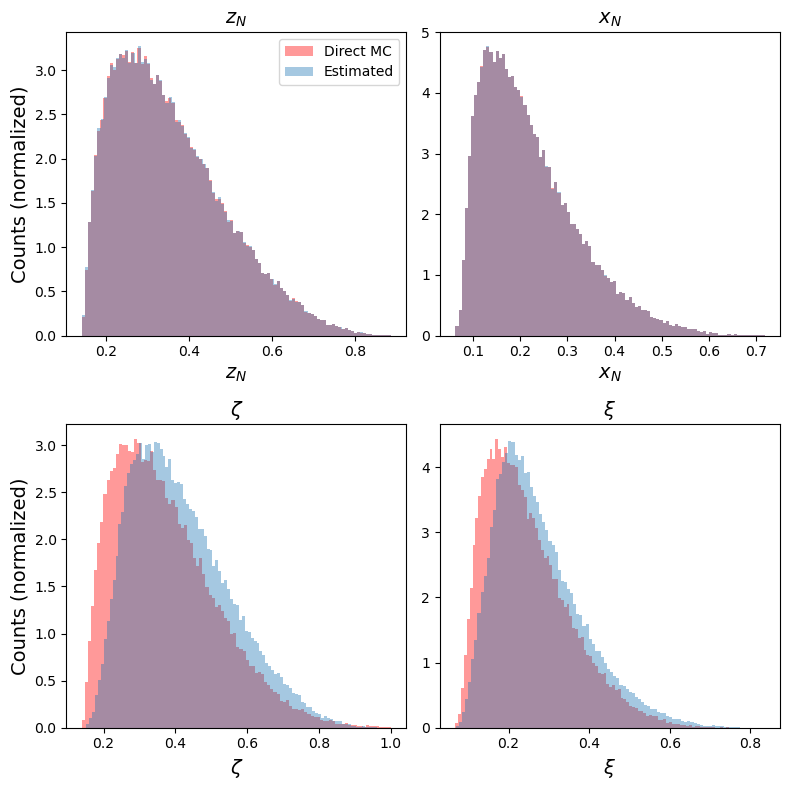

In [18]:
fig_zx,axs_zx = plot.subplots(2,2,figsize = (8,8))
titles = [r"$z_N$",r"$x_N$",r"$\zeta$",r"$\xi$"]
keys = ["z_N","x_N","zeta","xi"]
x_labels = [r"$z_N$",r"$x_N$",r"$\zeta$",r"$\xi$"]
for i in range(4):
    col = i % 2
    row = i // 2
    if(i == 2):
        zeta = MC[keys[i]]
        zeta = zeta[zeta < 1]
        axs_zx[row,col].hist(zeta,bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    else:
        axs_zx[row,col].hist(MC[keys[i]],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    axs_zx[row,col].hist(driver[keys[i]],bins = 100,alpha = 0.4,density=True,label = "Estimated");
    axs_zx[row,col].set_title(titles[i],fontsize=14)
    axs_zx[row,col].set_xlabel('xlabel', fontsize=14)
    axs_zx[row,col].set_xlabel(x_labels[i])
axs_zx[0][0].legend()
# axs_zx[1][0].set_ylim(0,1)
# axs_zx[1][0].set_xlim(0,10)
axs_zx[0][0].set_ylabel("Counts (normalized)", fontsize=14)
axs_zx[1][0].set_ylabel("Counts (normalized)",fontsize = 14)
fig_zx.tight_layout()
fig_zx.savefig("BoxAffinity/Plots_S24/DNP/x_N_z_N_oct_1.pdf")

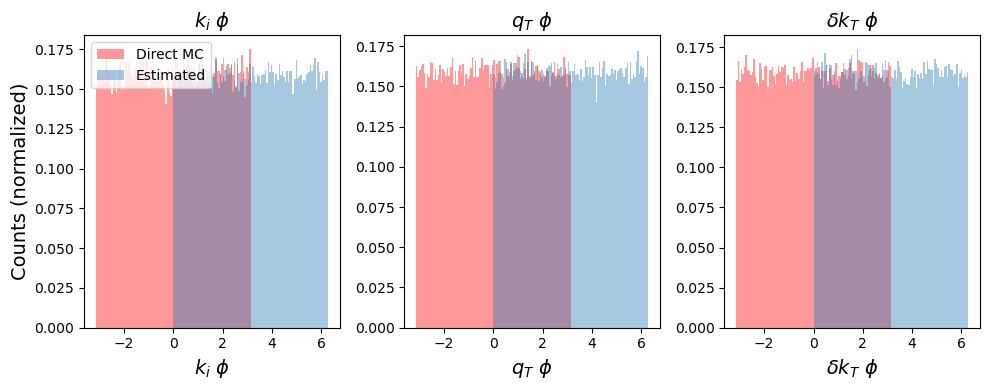

In [19]:
fig_kin,axs_kin = plot.subplots(1,3,figsize = (10,4))
titles = [r"$k_i$ $\phi$",r"$q_T$ $\phi$",r"$\delta k_T$ $\phi$"]
keys = ["theta_ki","theta_H","theta_deltak"]
x_labels = [r"$k_i$ $\phi$",r"$q_T$ $\phi$",r"$\delta k_T$ $\phi$"]
for i in range(3):
    axs_kin[i].hist(MC[keys[i]],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    axs_kin[i].hist(driver[keys[i]],bins = 100,alpha = 0.4,density=True,label = "Estimated");
    # axs_kin[i].set_xlim(0,1);
    axs_kin[i].set_title(titles[i],fontsize=14)
    axs_kin[i].set_xlabel('xlabel', fontsize=14)
    axs_kin[i].set_xlabel(x_labels[i])
axs_kin[0].legend()
axs_kin[0].set_ylabel('ylabel', fontsize=14)

axs_kin[0].set_ylabel("Counts (normalized)")
fig_kin.tight_layout()
fig_kin.savefig("BoxAffinity/Plots_S24/DNP/angles_oct_1.pdf")

# R1 Demo with new qTQ

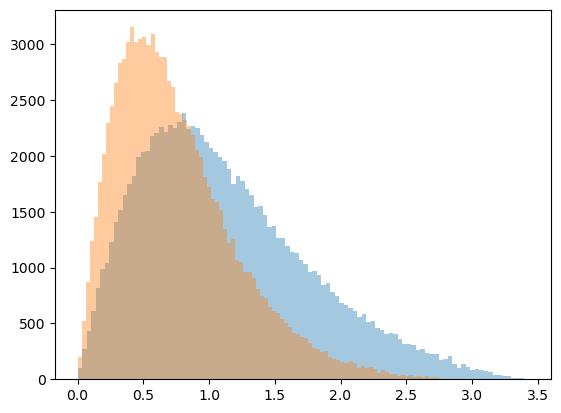

In [26]:
plot.hist(driver_MCNP["qTQ_division"],bins = 100,alpha = 0.4);
plot.hist(driver_MCNP["qTQ_hadron"],bins = 100,alpha = 0.4);

Text(0.5, 0, '$R_1$')

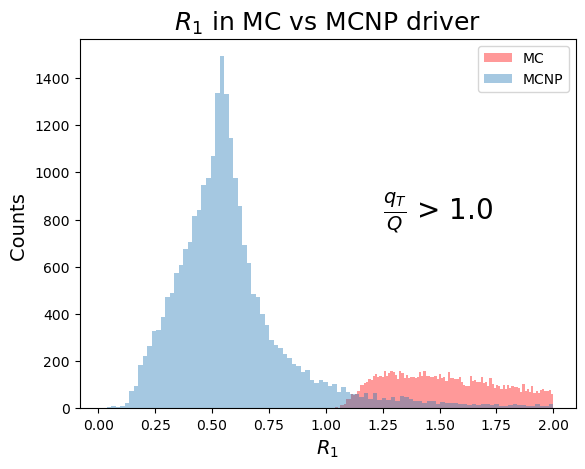

In [16]:
'''CHOOSE ONE OF THE BELOW OPTIONS'''

qtcut = 1
qtcut_type = "gt"

# qtcut = 0.3
# qtcut_type = "lt"

'''END OF OPTIONS'''


ratios = [MC['R0'],MC['R1'],MC['R2']]
MCNP_ratios = [driver_MCNP['R0'],driver_MCNP['R1'],driver_MCNP['R2']]


for i in range(3):
    if(qtcut_type == "gt"):
        ratios[i] = ratios[i][MC_qTQ >qtcut]
        MCNP_ratios[i] = MCNP_ratios[i][driver_MCNP["qTQ_hadron"] >qtcut]
    else:
        ratios[i] = ratios[i][MC_qTQ <qtcut]
        MCNP_ratios[i] = MCNP_ratios[i][driver_MCNP["qTQ_hadron"] <qtcut]
ratios_cut = [[],[],[]]
ratios_cut2 = [[],[],[]]
MCNP_ratios_cut = [[],[],[]]
MCNP_ratios_cut2 = [[],[],[]]
ub = 2
lb = 0
for i in range(3):
    ratios_cut[i] = ratios[i][ratios[i] > lb]
    ratios_cut2[i] = ratios_cut[i][ratios_cut[i] < ub]
    MCNP_ratios_cut[i] = MCNP_ratios[i][MCNP_ratios[i] > lb]
    MCNP_ratios_cut2[i] = MCNP_ratios_cut[i][MCNP_ratios_cut[i] < ub]
if(qtcut_type == "gt"):
    qt_text = r"$\frac{q_T}{Q}$ > %.1f"%qtcut
    plot.text(1.25,800,qt_text,fontsize = 20)
else:
    qt_text = r"$\frac{q_T}{Q}$ < %.1f"%qtcut
    plot.text(0.5,100,qt_text,fontsize = 20)
plot.hist(ratios_cut2[1],bins = 100,alpha = 0.4,color = "red",label = "MC");
plot.hist(MCNP_ratios_cut2[1],bins = 100,alpha = 0.4, label = "MCNP");
plot.legend()
plot.title(r"$R_1$ in MC vs MCNP driver",fontsize = 18)
plot.ylabel("Counts ",fontsize = 14)
plot.xlabel(r"$R_1$",fontsize = 14)
# plot.savefig("BoxAffinity/Plots_S24/DNP/R1_low_qTQ.pdf")

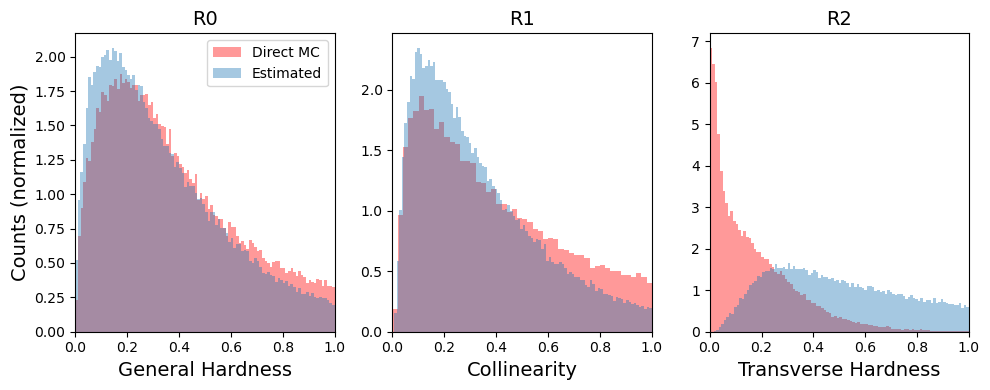

In [21]:
fig_ratios,axs_ratios = plot.subplots(1,3,figsize = (10,4))
titles = ["R0","R1","R2"]
x_labels = ["General Hardness","Collinearity","Transverse Hardness"]
for i in range(3):
    axs_ratios[i].hist(MC_cut_second[i],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    # axs_ratios[i].hist(driver_MCNP_cut_second[i],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
    axs_ratios[i].hist(driver_cut_second[i],bins = 100,alpha = 0.4,density=True,label = "Estimated");
    axs_ratios[i].set_xlim(0,1);
    axs_ratios[i].set_title(titles[i],fontsize=14)
    axs_ratios[i].set_xlabel(x_labels[i], fontsize=14)
axs_ratios[0].legend()

axs_ratios[0].set_ylabel("Counts (normalized)", fontsize=14)
fig_ratios.tight_layout()
fig_ratios.savefig("BoxAffinity/Plots_S24/DNP/ratios_comp_oct_1_driver.pdf")

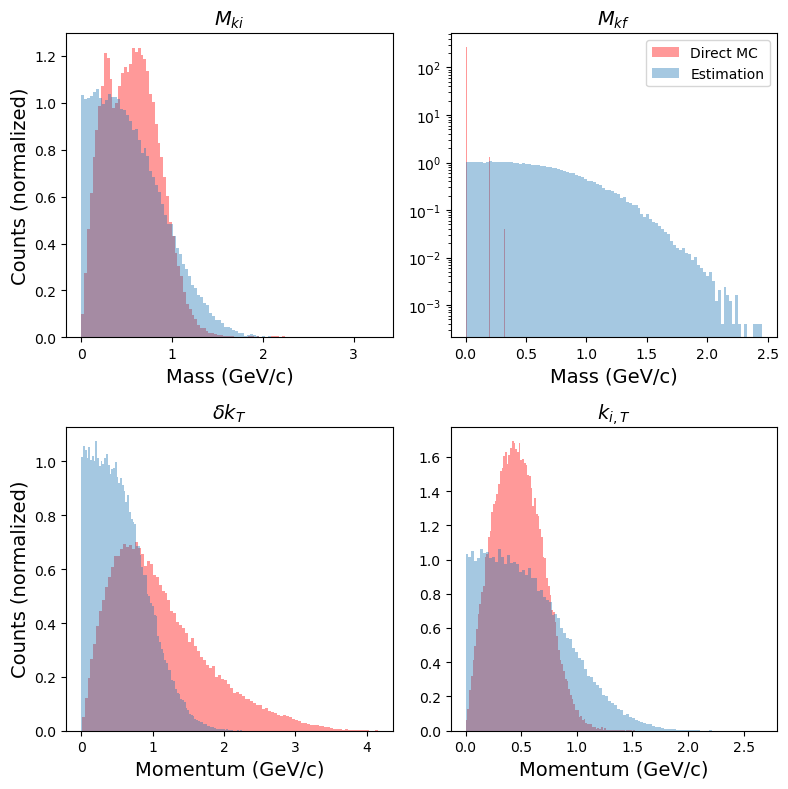

In [11]:
fig_partons, axs_partons = plot.subplots(2,2,figsize = (8,8))
parton_keys = ["M_ki","M_kf","delta_k_t","ki_t"]
titles = [r"$M_{ki}$",r"$M_{kf}$",r"$\delta k_T$",r"$k_{i,T}$"]
x_labels = ["Mass (GeV/c)","Mass (GeV/c)","Momentum (GeV/c)","Momentum (GeV/c)"]
# fig_partons.suptitle("Partonic Variables")
for i in range(4):
    col = i % 2
    row = i // 2
    axs_partons[row,col].hist(MC[parton_keys[i]],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
    axs_partons[row,col].hist(driver[parton_keys[i]],bins = 100,alpha = 0.4,density=True,label = "Estimation");
    axs_partons[row,col].set_title(titles[i],fontsize=14)
    axs_partons[row,col].set_xlabel('xlabel', fontsize=14)
    axs_partons[row,col].set_xlabel(x_labels[i])
axs_partons[0,1].legend()

axs_partons[0,0].set_ylabel("Counts (normalized)", fontsize=14)
axs_partons[1,0].set_ylabel("Counts (normalized)", fontsize=14)
# axs_partons[1].set_ylim(0,50)
axs_partons[0,1].set_yscale('log')
fig_partons.tight_layout()
fig_partons.savefig("BoxAffinity/Plots_S24/DNP/partons_oct_1.pdf")

# OLD

NameError: name 'driver_MCNP_low' is not defined

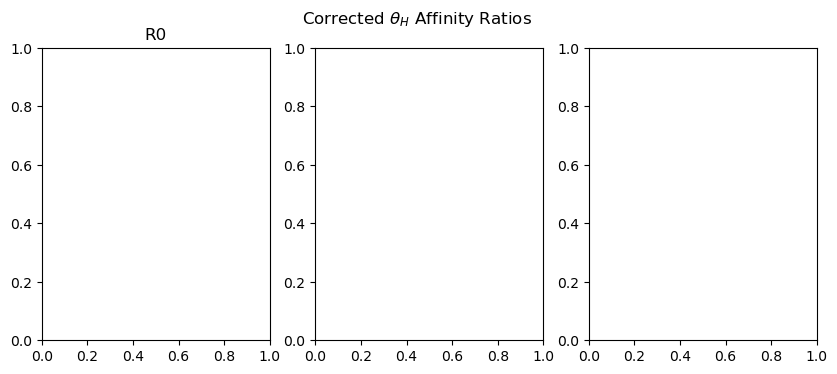

In [21]:
fig_R, axs_R = plot.subplots(1,3,figsize = (10,3.8))
fig_R.suptitle(r"Corrected $\theta_H$ Affinity Ratios")
axs_R[0].set_title("R0")
axs_R[0].hist(driver_MCNP["R0"],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R[0].hist(MC_low["R0"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R[0].legend()
axs_R[0].set_xlabel("R0")
axs_R[0].set_ylabel("Normalized Counts")

axs_R[1].set_title("R1")
axs_R[1].hist(driver_MCNP_low["R1"][driver_MCNP_low["R1"] < 10],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R[1].hist(MC_low["R1"][MC_low["R1"]],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R[1].legend()
axs_R[1].set_xlabel("R1")

axs_R[2].set_title("R2")
axs_R[2].hist(driver_MCNP_low["R2"][driver_MCNP_low["R2"] < 10],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R[2].hist(MC_low["R2"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R[2].legend()
axs_R[2].set_xlabel("R2")
fig_R.tight_layout()
# fig_R.savefig("Histos/Sept_25_ratios_no_binning.jpeg", dpi=600)

## Plotting partonic distributions for MC and driver

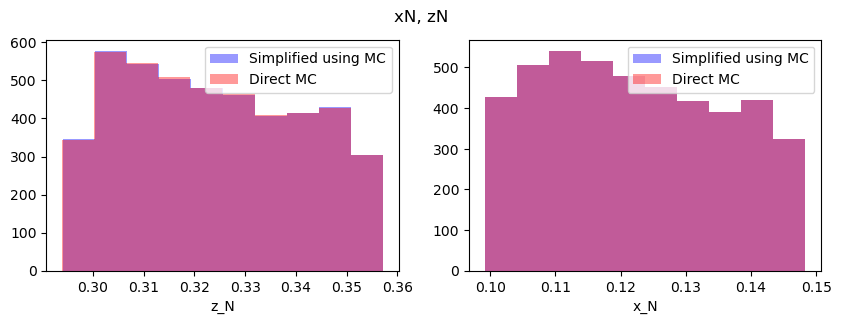

In [23]:
xzfig, xzax = plot.subplots(1,2, figsize = (10,3))
xzfig.suptitle("xN, zN")
xzax[0].hist(driver_MCNP_low["z_N"],color = "blue", alpha = 0.4,label = "Simplified using MC");
xzax[0].hist(MC_low["z_N"],color = "red", alpha = 0.4,label = "Direct MC");
xzax[0].set_xlabel("z_N")
xzax[1].hist(driver_MCNP_low["x_N"],color = "blue", alpha = 0.4,label = "Simplified using MC");
xzax[1].hist(MC_low["x_N"],color = "red", alpha = 0.4,label = "Direct MC");
xzax[1].set_xlabel("x_N")
xzax[0].legend()
xzax[1].legend()
plot.show()
xzfig.savefig("Plots_S24/September_24/xzn.pdf")

In [16]:
driver_arrs = [driver_low["M_ki"],driver_low["M_kf"],driver_low["delta_k_t"],driver_low["ki_t"],driver_low["zeta"],driver_low["xi"],driver_low["theta_deltak"],driver_low["theta_H"],driver_low["theta_ki"]]
driver_MCNP_arrs = [driver_MCNP_low["M_ki"],driver_MCNP_low["M_kf"],driver_MCNP_low["delta_k_t"],driver_MCNP_low["ki_t"],driver_MCNP_low["zeta"],driver_MCNP_low["xi"],driver_MCNP_low["theta_deltak"],driver_MCNP_low["theta_H"],driver_MCNP_low["theta_ki"]]
MC_arrs = [MC_low["M_ki"],MC_low["M_kf"],MC_low["delta_k_t"],MC_low["ki_t"],MC_low["zeta"],MC_low["xi"],MC_low["theta_deltak"],MC_low["theta_H"],MC_low["theta_ki"]]

In [17]:
driver_Rs = [driver_low["R0"],driver_low["R1"],driver_low["R2"]]
MC_Rs = [MC_low["R0"],MC_low["R1"],MC_low["R2"]]
driver_MCNP_Rs = [driver_MCNP_low["R0"],driver_MCNP_low["R1"],driver_MCNP_low["R2"]]

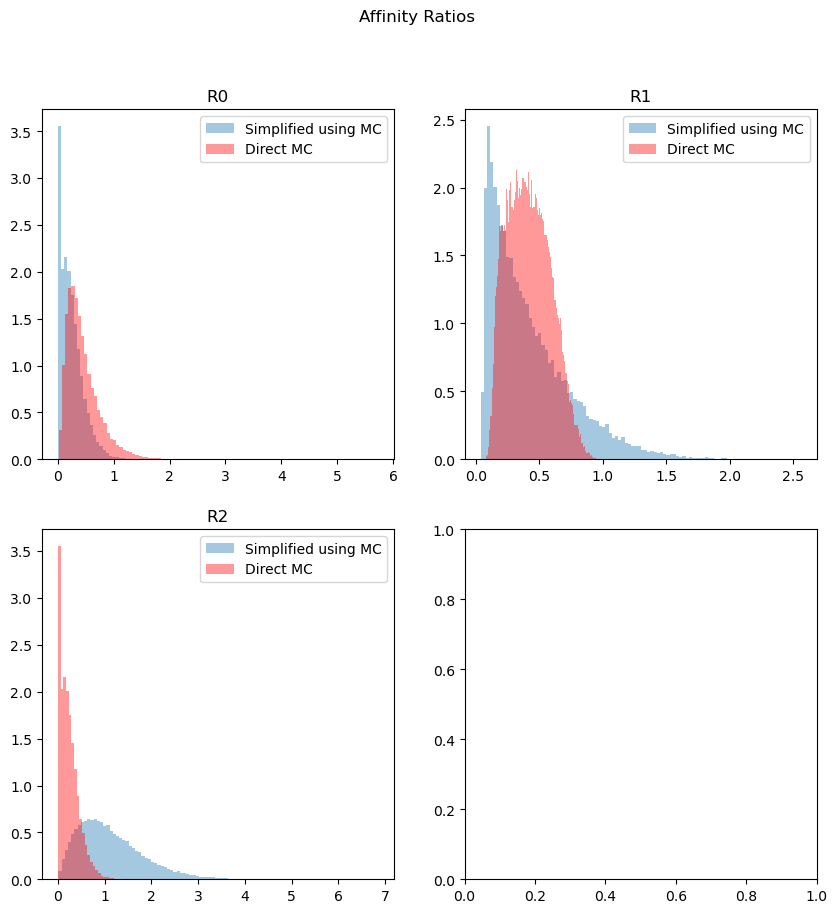

In [18]:
fig_R_old, axs_R_old = plot.subplots(2,2,figsize = (10,10))
fig_R_old.suptitle("Affinity Ratios")
axs_R_old[0,0].set_title("R0")
axs_R_old[0,0].hist(driver_MCNP_low["R0"],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R_old[0,0].hist(MC_low["R0"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R_old[0,0].legend()

axs_R_old[0,1].set_title("R1")
axs_R_old[0,1].hist(driver_MCNP_low["R1"][driver_MCNP_low["R1"] < 10],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R_old[0,1].hist(MC_low["R1"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R_old[0,1].legend()

axs_R_old[1,0].set_title("R2")
axs_R_old[1,0].hist(driver_MCNP_low["R2"][driver_MCNP_low["R2"] < 10],bins = 100,alpha = 0.4,density=True,label = "Simplified using MC");
axs_R_old[1,0].hist(MC_low["R2"],bins = 100,color = "red",alpha = 0.4,density=True,label = "Direct MC");
axs_R_old[1,0].legend()
fig_R_old.savefig("Histos/Aug_26_ratios_MCNP_MC_bug.pdf")

In [6]:
zeta_MC = MC_arrs[4]

In [7]:
zeta_MC_cut = zeta_MC[zeta_MC < 10]

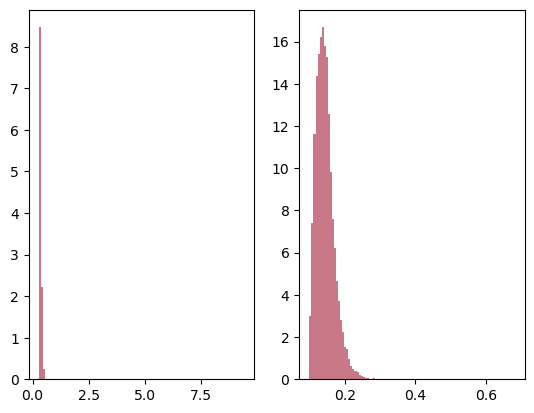

In [8]:
fig_xz, axs_xz = plot.subplots(1,2)
axs_xz[0].hist(driver_MCNP_arrs[4][driver_MCNP_arrs[4] < 10],bins = 100,alpha = 0.4,density = True);
axs_xz[0].hist(zeta_MC_cut,bins = 100,color = "red",alpha = 0.4,density = True);

axs_xz[1].hist(driver_MCNP_arrs[5],bins = 100,alpha = 0.4,density = True);
axs_xz[1].hist(MC_arrs[5],bins = 100,color = "red",alpha = 0.4,density = True);
# fig_xz, axs_xz = plot.subplots(2,2)
# axs_xz[0,0].hist(driver_arrs[4],bins = 100,alpha = 0.4,density = True);
# axs_xz[0,1].hist(zeta_MC_cut,bins = 100,color = "red",alpha = 0.4,density = True);

# axs_xz[1,0].hist(driver_arrs[5],bins = 100,alpha = 0.4,density = True);
# axs_xz[1,1].hist(MC_arrs[5],bins = 100,color = "red",alpha = 0.4,density = True);

# fig_xz, axs_xz = plot.subplots(3,2,figsize=(12,16))
# axs_xz[0,0].hist(driver_arrs[4][driver_arrs[4] < 10],bins = 100,alpha = 0.4,density = True);
# axs_xz[1,0].hist(zeta_MC_cut,bins = 100,color = "red",alpha = 0.4,density = True);
# axs_xz[2,0].hist(driver_MCNP_arrs[4][driver_MCNP_arrs[4] < 10] ,bins = 100,color = "green",alpha = 0.4,density = True);

# axs_xz[0,1].hist(driver_arrs[5],bins = 100,alpha = 0.4,density = True);
# axs_xz[1,1].hist(MC_arrs[5],bins = 100,color = "red",alpha = 0.4,density = True);
# axs_xz[2,1].hist(driver_MCNP_arrs[5],bins = 100,color = "green",alpha = 0.4,density = True);

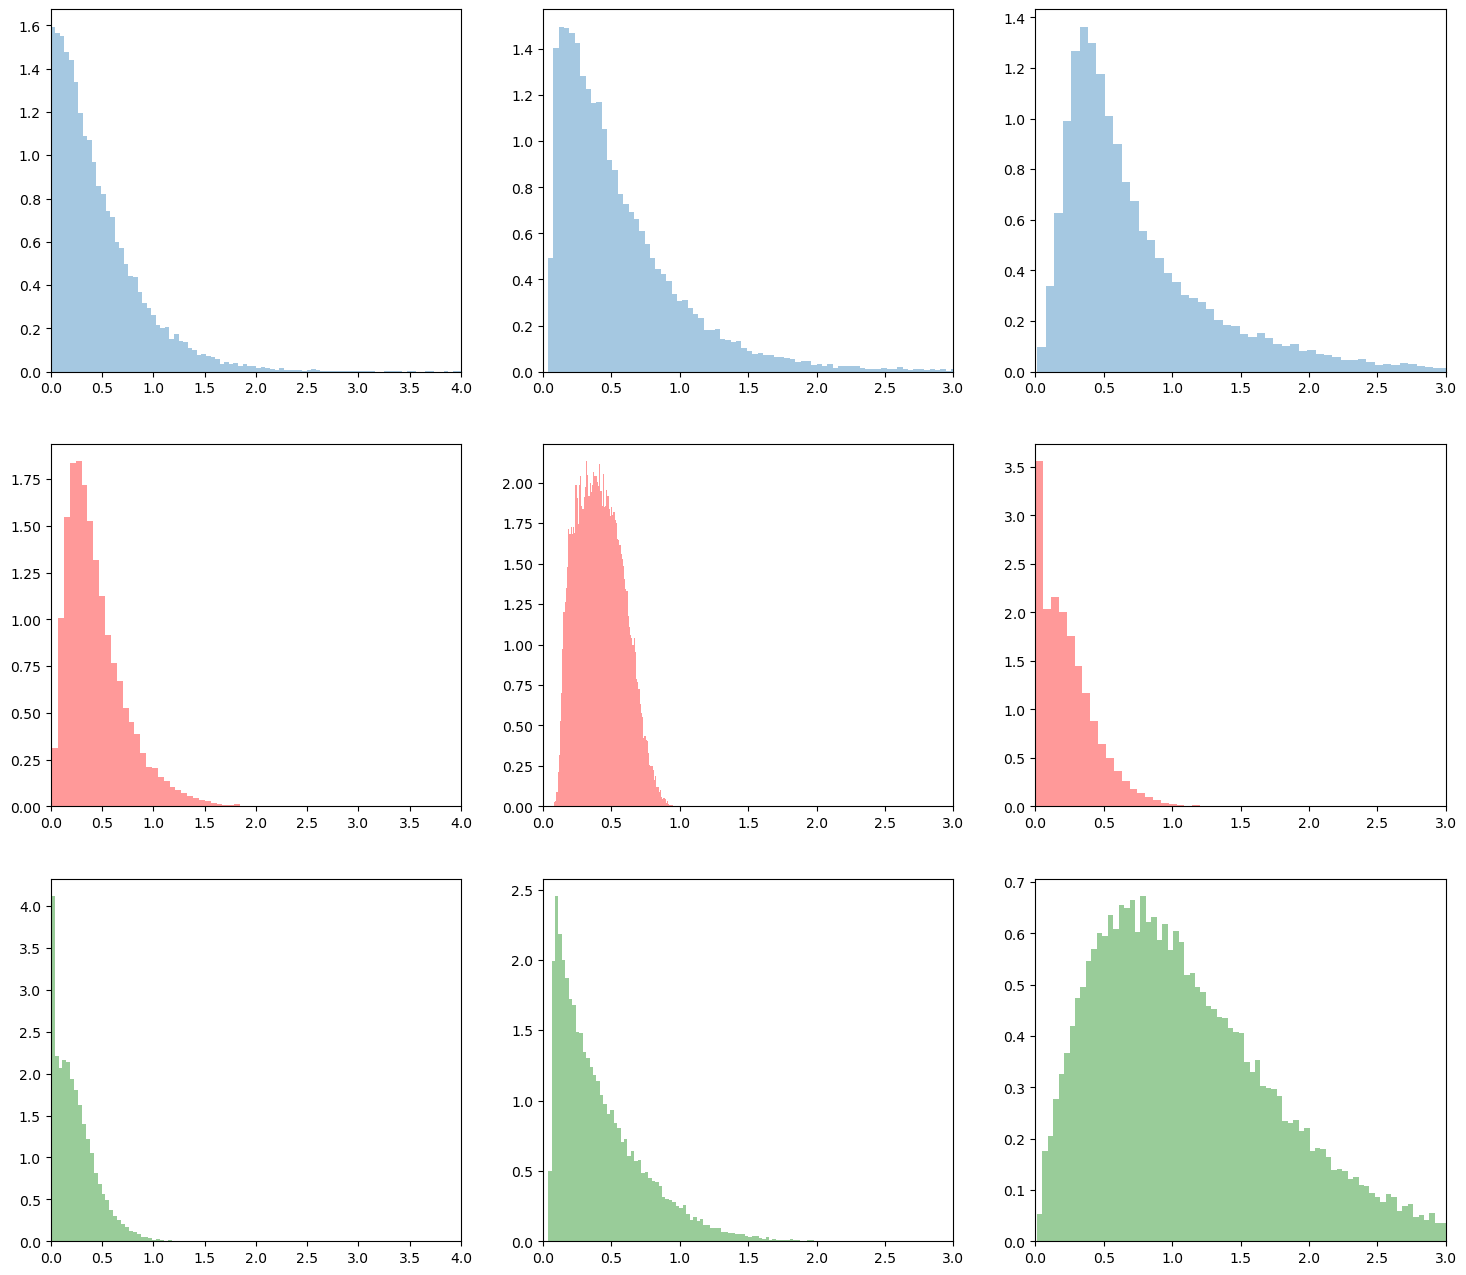

In [11]:
fig_xz, axs_xz = plot.subplots(3,3,figsize=(18,16))
axs_xz[0,0].hist(driver_Rs[0],bins = 100,alpha = 0.4,density = True);
axs_xz[0,0].set_xlim(0,4)
axs_xz[1,0].set_xlim(0,4)
axs_xz[2,0].set_xlim(0,4)
axs_xz[1,0].hist(MC_Rs[0],bins = 100,color = "red",alpha = 0.4,density = True);
axs_xz[2,0].hist(driver_MCNP_Rs[0][driver_MCNP_Rs[0] < 4],bins = 100,color = "green",alpha = 0.4,density = True);

axs_xz[0,1].hist(driver_Rs[1][driver_Rs[1] < 4],bins = 100,alpha = 0.4,density = True);
axs_xz[0,1].set_xlim(0,3)
axs_xz[1,1].set_xlim(0,3)
axs_xz[2,1].set_xlim(0,3)
axs_xz[1,1].hist(MC_Rs[1],bins = 100,color = "red",alpha = 0.4,density = True);
axs_xz[2,1].hist(driver_MCNP_Rs[1][driver_MCNP_Rs[1] < 4],bins = 100,color = "green",alpha = 0.4,density = True);

axs_xz[0,2].hist(driver_Rs[2],bins = 100,alpha = 0.4,density = True);
axs_xz[0,2].set_xlim(0,3)
axs_xz[1,2].set_xlim(0,3)
axs_xz[2,2].set_xlim(0,3)
axs_xz[1,2].hist(MC_Rs[2],bins = 100,color = "red",alpha = 0.4,density = True);
axs_xz[2,2].hist(driver_MCNP_Rs[2][driver_MCNP_Rs[2] < 4],bins = 100,color = "green",alpha = 0.4,density = True);

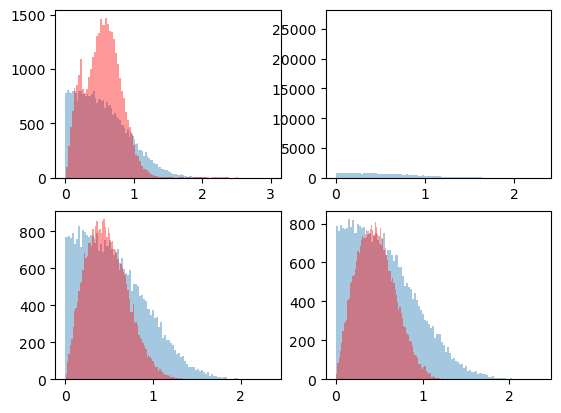

In [11]:
fig, axs = plot.subplots(2,2)
axs[0,0].hist(driver_arrs[0],bins = 100,alpha = 0.4);
axs[0,0].hist(MC_arrs[0],bins = 100,color = "red",alpha = 0.4);

axs[0,1].hist(driver_arrs[1],bins = 100,alpha = 0.4);
axs[0,1].hist(MC_arrs[1],bins = 100,color = "red",alpha = 0.4);

axs[1,0].hist(driver_arrs[2],bins = 100,alpha = 0.4);
axs[1,0].hist(MC_arrs[2],bins = 100,color = "red",alpha = 0.4);

axs[1,1].hist(driver_arrs[3],bins = 100,alpha = 0.4);
axs[1,1].hist(MC_arrs[3],bins = 100,color = "red",alpha = 0.4);